In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('who_suicide_statistics.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [5]:
df = df.sort_values(['year'], ascending = True)

In [6]:
df.head()

,country,year,sex,age,suicides_no,population
6204,Brazil,1979,female,15-24 years,385.0,12448100.0
26470,Netherlands,1979,male,55-74 years,217.0,1040500.0
26471,Netherlands,1979,male,75+ years,93.0,235800.0
2615,Austria,1979,male,75+ years,NaN,141900.0
2614,Austria,1979,male,55-74 years,NaN,573800.0


In [7]:
df.rename({'sex' : 'gender', 'suicides_no' : 'suicides'}, inplace = True, axis = 1)

In [8]:
df.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [13]:
df['country'].value_counts().count()

141

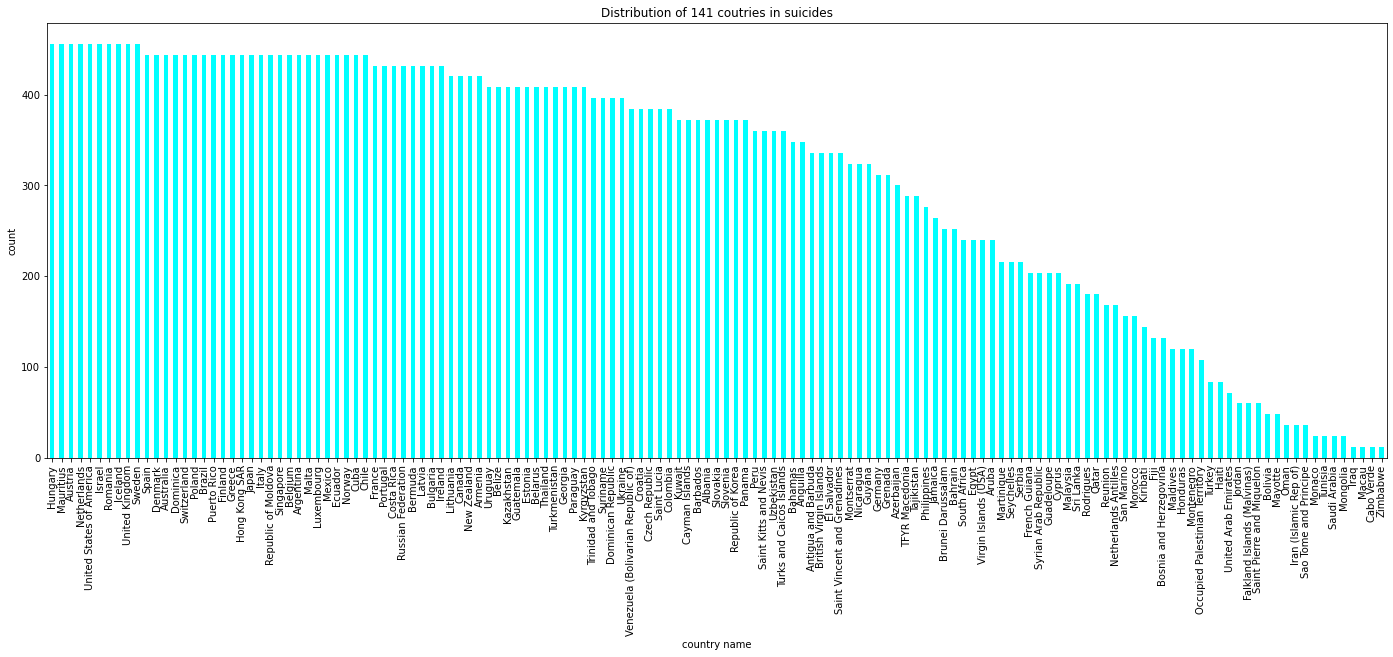

In [14]:
df['country'].value_counts(normalize = True)
df['country'].value_counts(dropna = False).plot.bar(color = 'cyan', figsize = (24, 8))

plt.title('Distribution of 141 coutries in suicides')
plt.xlabel('country name')
plt.ylabel('count')
plt.show()

In [15]:
df['year'].value_counts().count()

38

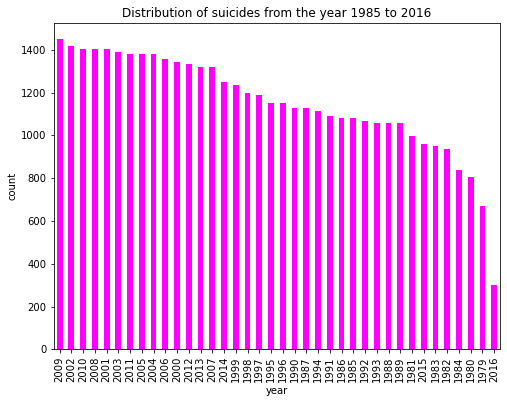

In [16]:
df['year'].value_counts(normalize = True)
df['year'].value_counts(dropna = False,).plot.bar(color = 'magenta', figsize = (8, 6))

plt.title('Distribution of suicides from the year 1985 to 2016')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [19]:
df['age'] = df['age'].replace('5-14 years', 0)
df['age'] = df['age'].replace('15-24 years', 1)
df['age'] = df['age'].replace('25-34 years', 2)
df['age'] = df['age'].replace('35-54 years', 3)
df['age'] = df['age'].replace('55-74 years', 4)
df['age'] = df['age'].replace('75+ years', 5)

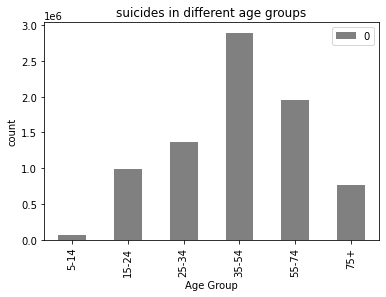

In [20]:
x1 = df[df['age'] == 0]['suicides'].sum()
x2 = df[df['age'] == 1]['suicides'].sum()
x3 = df[df['age'] == 2]['suicides'].sum()
x4 = df[df['age'] == 3]['suicides'].sum()
x5 = df[df['age'] == 4]['suicides'].sum()
x6 = df[df['age'] == 5]['suicides'].sum()

x = pd.DataFrame([x1, x2, x3, x4, x5, x6])
x.index = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
x.plot(kind = 'bar', color = 'grey')

plt.title('suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.show()


In [21]:
df['population'] = df['population'].fillna(df['population'].median())
df['suicides'] = df['suicides'].fillna(0)

In [22]:
df['population'].isnull().any()
df['suicides'].isnull().any()

False

In [23]:
df = df[['country', 'year', 'gender', 'age', 'population', 'suicides']]
df.head(0)

,country,year,gender,age,population,suicides


In [27]:
df = df.drop(['country'], axis = 1)

In [28]:
df.head(0)

,year,gender,age,population,suicides


In [29]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [31]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [32]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [35]:
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

MSE : 622940.7905771923


In [36]:
rmse = np.sqrt(mse)
print("RMSE :", rmse)

RMSE : 789.2659821487256


In [38]:
from sklearn.metrics import r2_score

In [39]:
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

r2_score : 0.034291120909835215


In [41]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [42]:
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

MSE : 93678.68121300188


In [43]:
rmse = np.sqrt(mse)
print("RMSE :", rmse)

RMSE : 306.0697325986382


In [44]:
from sklearn.metrics import r2_score

In [45]:
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

r2_score : 0.8547753886127277
